### 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [7]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("====================")
df1 = df.fillna(method='pad')
print(df1)
print("====================")
df1 = df.fillna(method="backfill")
print(df1)
print("====================")
df1 = df.fillna(method="pad",limit=1)
print(df1)
print("====================")
df2 = df.fillna(method="backfill",limit=1)
print(df2)

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   NaN   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0  34.0  11.0  8.0
4   3.0  34.0  11.0  8.0
5   3.0   5.0  11.0  8.0
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   5.0  11.0  8.0
3   3.0   5.0   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0   NaN  11.0  8.0
4   3.0   NaN   NaN  NaN
5   3.0   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   NaN  11.0  8.0
3   3.0   NaN   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN


## 重複值偵測
+ 可利用 duplicated( ) 方法檢查 dataframe 內的 row 是否有完整重複值資料。
+ 若 duplicated( ) 方法內加入欄位名稱代表檢查某欄位是否有重複資料。
+ drop_duplicates( ) 方法將會丟棄重複值：
  + 預設保留第一個。
  + 若加入 keep=‘first’ 將得到相同結果。
  + 若加入 keep=‘last’ 將保留最後一個。
  + 若加入 keep=False 代表不保留。
+ 站在 row 的角度，若有多個重複的資料，那 row 也會執行多個重複值的檢查與刪除。
+ 站在 column 角度，若要進行重複值的檢查與刪除，必須告訴他column 名稱，若是兩個欄位以上，請加入 subset=[‘欄位1’,‘欄位2’]。
  

In [8]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5


In [10]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("==========================")
print(df.duplicated())
print("==========================")
print(df.duplicated("A"))
print("==========================")
print(df.duplicated("D"))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
0    False
1    False
2     True
3    False
dtype: bool
0    False
1    False
2     True
3    False
dtype: bool
0    False
1     True
2     True
3     True
dtype: bool


### 丟棄重複值的資料

In [13]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("===============================")
print(df.drop_duplicates())
print("===============================")
print(df.drop_duplicates(keep="last"))
print("===============================")
print(df.drop_duplicates(keep=False))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5


In [21]:
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("=======")
print(df.drop_duplicates(subset=['C','D']))
print("=======")
print(df.drop_duplicates(subset=['C','D'],keep='last'))
print("=======")
print(df.drop_duplicates(subset=['C','D'],keep=False))
print("=======")
print(df.drop_duplicates(subset=['A','D'],keep=False))
print("=======")
print(df.drop_duplicates(subset=['B']))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
   A  B  C  D
0  2  3  5  5
    A   B  C  D
3  13  23  5  5
Empty DataFrame
Columns: [A, B, C, D]
Index: []
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5


# 資料新增刪除轉換與取代
+ DdataFrame的新增
+ DdataFrame的刪除
+ 資料轉換處理包含
  + 資料取代
  + 資料分析後轉換
+ 資料取代
  + 可使用 replace 方式來替換指定的值
+ Column 的索引值名稱變更
  + df=df.rename(columns={'原來名稱':'新的名稱'})  

## 資料分析轉換
+ Series 的 map 方法可以接受一個函數或含有 map 關係的字典型資訊。
+ 使用 map 是一種實現元素轉換以及其他資訊清理工作的方式。 
+ 可以搭配 Series 或 dict、匿名函數與一般函數作業。

In [25]:
import pandas as pd
s1 = pd.Series(range(10))
print(s1)
print("=================")
s2 = s1.map(lambda x:x+10)
print(s2)
print("=================")
s3 = s1.map(lambda x:x*-1)
print(s3)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
0    0
1   -1
2   -2
3   -3
4   -4
5   -5
6   -6
7   -7
8   -8
9   -9
dtype: int64


In [27]:
import pandas as pd
x = pd.Series([1,2,3],index=['one','two','three'])
y = pd.Series(['foo','bar','baz'],index=[1,2,3])
x1 = x.map(y)
print(x1)
z = {1:"A",2:'B',3:'C'}
x2 = x.map(z)
print("===================")
print(x2)

one      foo
two      bar
three    baz
dtype: object
one      A
two      B
three    C
dtype: object


In [29]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
print(type(data['food']))
print("=======================")
meat_to_animal = {
    'bacon':'pig', 'pulled pork':'pig',
    'pastrami':'cow','corned beef':'cow',
    'honey ham':'pig', 'nova lox':'salmon' }
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
print("=======================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
<class 'pandas.core.series.Series'>
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  Corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [37]:
import pandas as pd
indexdate = pd.date_range('2018-09-25',periods = 10)
s1 = pd.Series(list(range(10)),index = indexdate)
print(s1)
s2 = s1.index.map(lambda x:x.day)
print(s2)
s3 = s1.index.map(lambda x:x.weekday)
print(s3)
s4 = s1.map(lambda x:x + 10)
print(s4)
s6 = pd.Series(list(range(10)),index = s3)
print(s6)

def f(x):
    if x< 5:
        return True
    else:
        return False
s5 = s1.map(f)
print(s5)

2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
Int64Index([25, 26, 27, 28, 29, 30, 1, 2, 3, 4], dtype='int64')
Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3], dtype='int64')
2018-09-25    10
2018-09-26    11
2018-09-27    12
2018-09-28    13
2018-09-29    14
2018-09-30    15
2018-10-01    16
2018-10-02    17
2018-10-03    18
2018-10-04    19
Freq: D, dtype: int64
1    0
2    1
3    2
4    3
5    4
6    5
0    6
1    7
2    8
3    9
dtype: int64
2018-09-25     True
2018-09-26     True
2018-09-27     True
2018-09-28     True
2018-09-29     True
2018-09-30    False
2018-10-01    False
2018-10-02    False
2018-10-03    False
2018-10-04    False
Freq: D, dtype: bool


## Apply

In [38]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
data['food-ounces'] = data.apply(lambda dataf:f"{dataf['food']}-{dataf['ounces']}",axis = 1)
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces      food-ounces
0        bacon     4.0        bacon-4.0
1  pulled pork     3.0  pulled pork-3.0
2        bacon    12.0       bacon-12.0
3     Pastrami     6.0     Pastrami-6.0
4  Corned beef     7.5  Corned beef-7.5
5        Bacon     8.0        Bacon-8.0
6     pastrami     3.0     pastrami-3.0
7    honey ham     5.0    honey ham-5.0
8     nova lox     6.0     nova lox-6.0


# 分組
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
  + 拆解 split：依據規則進行拆解分組。
  + 應用 apply：每個分組運行計算規則處理。
  + 合併 combine：把每個分組的計算結果合併起來。
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
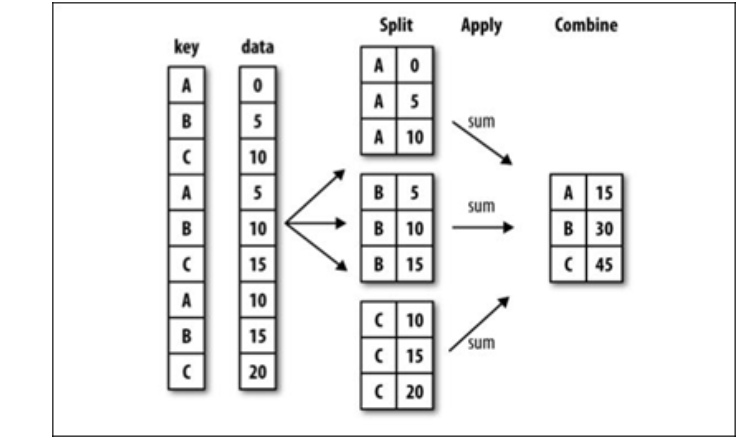
+ 可使用 groupby( ) 進行分組，而這動作並沒有進行實際運算，只是包含分組的資訊。
+ 物體可有多種切割方式：
  + df1.groupby('key')
  + df1.groupby(['key1','key2'])
  + df1.groupby(key,axis=1)

### 群組資料原型

In [39]:
import pandas as pd
import numpy as np
a = {'key1' : ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'a'],
     'key2' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'data1': [2,3,4,5,6,7,8,1],
     'data2':[8,1,2,3,5,6,7,6]}
df1 = pd.DataFrame(a)
print(df1)
print("-------------------")

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------


### 開始群組

In [40]:
import pandas025
df2=pandas025.df1
print(type(df2.groupby('key1')))
print(type(df2['data1'].groupby(df2['key1'])))
print((df2['data1'].groupby(df2['key1'])))

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


### stack 與 unstack
+ stack
   + colum index轉為row index
+ unstack
  + row index轉為colum index

In [43]:
import pandas as pd
data = {"A":10,"B":15,"C":18,"D":25}
data2 = {"A":75,"B":83,"C":92,"D":63}
s1 = pd.Series(data)
s2 = pd.Series(data2)
df = pd.DataFrame({"colum1":s1,"colum2":s2},index = pd.Index(["A","B","C","D"],name="rowIndex"))
print(df)
print("==========================")
dfs = df.stack()
print(dfs)
print(dfs.unstack())

          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63
rowIndex        
A         colum1    10
          colum2    75
B         colum1    15
          colum2    83
C         colum1    18
          colum2    92
D         colum1    25
          colum2    63
dtype: int64
          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63


## pandas025a的內容

In [44]:
import pandas025
df2=pandas025.df1
print("==========df2=================")
print(df2)
self_def_key = [0, 1, 2, 3, 3, 4, 5, 7]
print("===========================")
print(df2.groupby(self_def_key).size()) #群組自訂的Kye
print("=========key1==================")
print(df2['key1'])
print("==========key2=================")
print(df2['key2'])
print("==========groupby key2 key1=================")
print(df2.groupby([df2['key2'],df2['key1']]).size())
#print(df2.groupby(['key2','key1']).size())print("===========================")
print("============groupby('key1')mean===============")
grouped1 = df2.groupby('key1')
print(grouped1.mean()) #整組Dataframe 都群組key1 求平均值
print("===========================")
grouped2 = df2['data1'].groupby(df2['key1']) #針對data1 groupby key1
print(grouped2.mean())
print("===========================")
print(grouped2.mean()[1])

==========df2=================
  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
=========key1==================
0    a
1    b
2    a
3    b
4    a
5    b
6    a
7    a
Name: key1, dtype: object
==========key2=================
0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: key2, dtype: object
==========groupby key2 key1=================
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
============groupby('key1')mean===============
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
5.0


In [45]:
import pandas025a
print("-------start--------")
#
"""
DataFrameGroupBy 轉成list後可清楚了他是一組list包含了tuple 
tuple內包含group_name 與 group_data
"""
print(list(pandas025a.grouped1)) 
print("---------------")
for group_name, group_data in pandas025a.grouped1: #透過以下方式可分別取出群組資料 grouped1使用key1做群組
    print("group_name:",group_name)
    print(group_data)
print("---------------")    
for group_name, group_data in pandas025a.grouped2: ## data1  使用key做群組
    print(group_name)
    print(group_data)
print("---------------")  

0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
-------start--------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
---------------
group_name: a
  key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6
group_name: b
  key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6
---------------
a
0    2
2    

### 分組後的資料-資料來源

In [46]:
# pandas027資料來源
import pandas as pd
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
print(df)
print("--------------------")

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
--------------------


In [49]:
import pandas027
grouped = pandas027.df.groupby('Year')
print(type(grouped))
for name,group in grouped:
    print(name)
    print(group)
print("=============================")    
print(grouped.get_group(2014))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701


## 資料轉換與設定
+ 分組後的資料可轉為 list 或 dictionary：
  + list( ) 轉換為 list。
  + 轉為 list 之後再以 dict( ) 方法轉為 dictionary。
+ 亦可以透過索引級別設定分組。

In [50]:
import pandas025a
print("-------start---------")
print(list(pandas025a.grouped1)) #list內有一組tuple ('分組kye',DataFrame)
print("--------")
print(dict(list(pandas025a.grouped1)))
print("--------")


-------start---------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
--------
{'a':   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6, 'b':   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6}
--------


### 自訂索引標籤方式分組
+ 當axis=0時，代表每一縱行去做運算
+ 當axis=1時，代表每一橫列去做運算
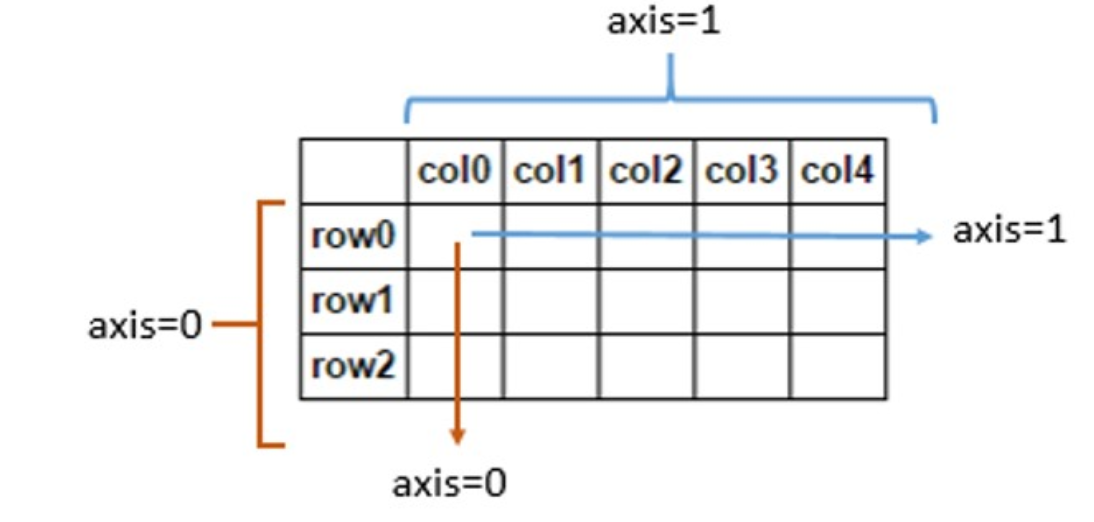

In [59]:
import pandas as pd
import numpy as np
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)), columns=['a', 'b', 'c', 'd', 'e'], index=['A', 'B', 'C', 'D', 'E'])
print(df3)
df3.iloc()[1,1:4] = np.NaN
print(df3)
print("======================")
mapping_dict = {'a':'Python','b':'Python','c':'Java','d':'C','e':'Java'}
print("size")
print(df3.groupby(mapping_dict,axis = 1).size())
print("count")
print(df3.groupby(mapping_dict,axis = 1).count())
print("sum")
print(df3.groupby(mapping_dict,axis= 1).sum())

   a  b  c  d  e
A  8  2  1  5  6
B  2  4  2  4  2
C  3  3  4  4  1
D  2  7  6  4  7
E  7  3  7  9  7
   a    b    c    d  e
A  8  2.0  1.0  5.0  6
B  2  NaN  NaN  NaN  2
C  3  3.0  4.0  4.0  1
D  2  7.0  6.0  4.0  7
E  7  3.0  7.0  9.0  7
size
C         1
Java      2
Python    2
dtype: int64
count
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
sum
     C  Java  Python
A  5.0   7.0    10.0
B  0.0   2.0     2.0
C  4.0   5.0     6.0
D  4.0  13.0     9.0
E  9.0  14.0    10.0


### count vs size(補)

In [60]:
df = pd.DataFrame({"Name":["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"],
                 "City":["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"],
                "Val":[4,3,3,np.nan,np.nan,4]})
print(df)
print("=======================")
# as_index=False 可使得index為自動流水號
dfg = df.groupby(["Name", "City"],as_index=False).count()#不包含nan 這樣組合且欄位內容存在的幾次
print(dfg)      
print("=======================")
dfg = df.groupby(["Name", "City"],as_index=False).size()#包含nan 這樣的組合出現幾次
print(dfg)    

      Name      City  Val
0    Alice   Seattle  4.0
1      Bob   Seattle  3.0
2  Mallory  Portland  3.0
3  Mallory   Seattle  NaN
4      Bob   Seattle  NaN
5  Mallory  Portland  4.0
      Name      City  Val
0    Alice   Seattle    1
1      Bob   Seattle    1
2  Mallory  Portland    2
3  Mallory   Seattle    0
      Name      City  size
0    Alice   Seattle     1
1      Bob   Seattle     2
2  Mallory  Portland     2
3  Mallory   Seattle     1
